# Introduction to matplotlib

So far we have seen some of the built in `pylab` code in notebooks for making plots. 

A more general interface is available and a more structured approach to using `matplotlib` is helpful.

   - [PDF documentation](../../Documentation/Matplotlib-user-2.0.0.pdf)
   - [Online gallery / cookbook](http://matplotlib.org/gallery.html)
   
Matplotlib fully embraces the python object-oriented model, but for some tasks the design of the object hierarchy is a little bit counter-intuitive. It's best to find a common pattern for building plots and stick to it. 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

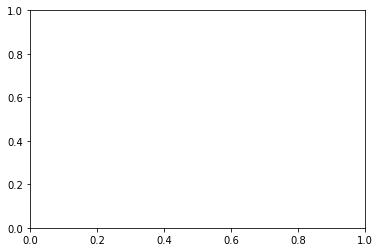

In [2]:
fig = plt.figure(figsize=(6, 4), facecolor="none")

ax = plt.subplot(111) # 1x1 array of plots, ax refers to the 1st of them

# Content is added to the blank axes instance
# ...

fig.savefig("test-figure.png", dpi=150)
plt.show()  # happens anyway !

---

A good way to look at the rendered image is to open it up in a markdown cell - or look in the file browser.

![test-figure.png](test-figure.png)


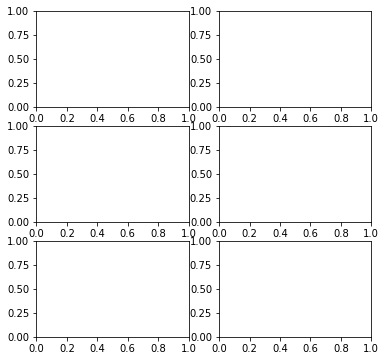

In [3]:
fig = plt.figure(figsize=(6,6), facecolor="none")

ax = plt.subplot(321)   # 3x2 array of plots, ax refers to the 1st of them
ax2 = plt.subplot(322) 

ax3 = plt.subplot(323) 
ax4 = plt.subplot(324) 

ax5 = plt.subplot(325) 
ax6 = plt.subplot(326) # 3x2 array of plots, ax6 refers to the last of them


# Content is added to the blank axes instance
# ...

fig.savefig("test-figure2.png", dpi=150)
plt.show()  # happens anyway !

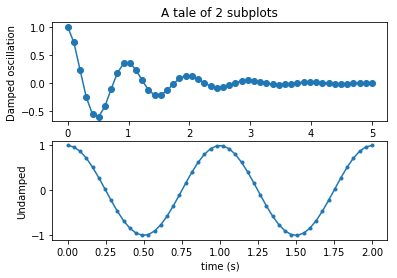

In [4]:
# Demo example

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

Text(0, 0.5, 'Not Damped')

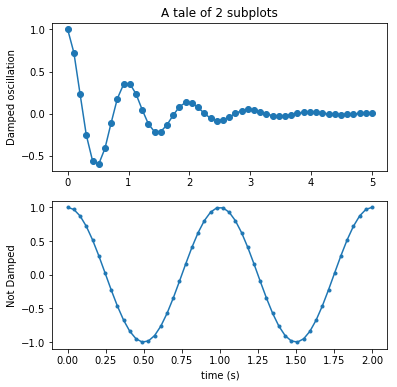

In [5]:
# My preference

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# Now set up the plot

fig = plt.figure(figsize=(6,6), facecolor="none")

ax  = plt.subplot(211)   # 2s1 array of plots, ax refers to the 1st of them
ax2 = plt.subplot(212) 


ax.plot(x1, y1, 'o-')
ax.set_title('A tale of 2 subplots')
ax.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Not Damped')



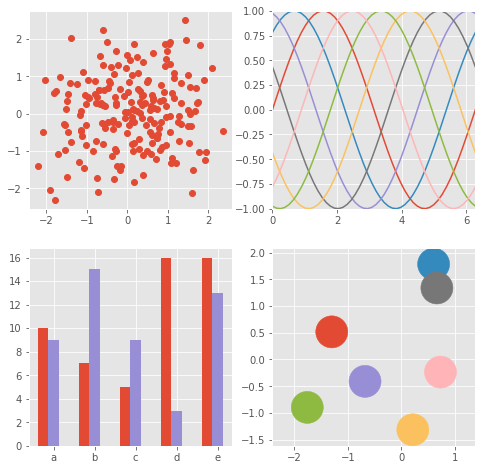

In [6]:
"""
==================
ggplot style sheet
==================

This example demonstrates the "ggplot" style, which adjusts the style to
emulate ggplot_ (a popular plotting package for R_).

These settings were shamelessly stolen from [1]_ (with permission).

.. [1] http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/

.. _ggplot: http://ggplot2.org/
.. _R: https://www.r-project.org/

"""

plt.style.use('ggplot')


# This is another way to set up the axes objects
# and may be preferable, but whichever - choose one and stick with it !

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()
fig.set_size_inches((8,8))

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)

plt.show()

In [7]:
## Go play with the gallery examples !! 



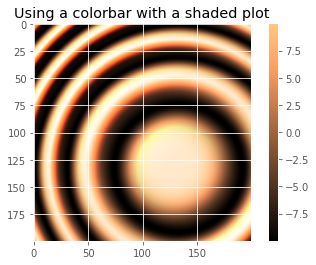

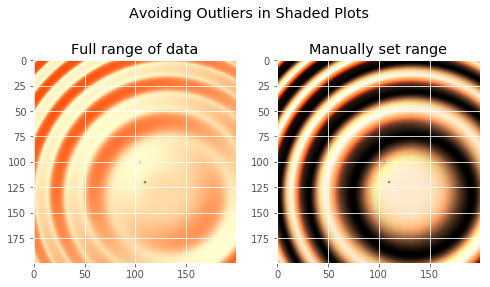

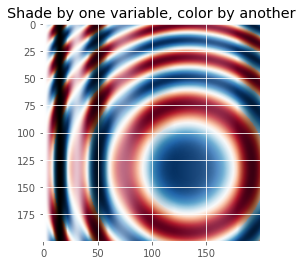

In [8]:

from matplotlib.colors import LightSource, Normalize


def display_colorbar():
    """Display a correct numeric colorbar for a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    cmap = plt.cm.copper
    ls = LightSource(315, 45)
    rgb = ls.shade(z, cmap)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')

    # Use a proxy artist for the colorbar...
    im = ax.imshow(z, cmap=cmap)
    im.remove()
    fig.colorbar(im)

    ax.set_title('Using a colorbar with a shaded plot', size='x-large')


def avoid_outliers():
    """Use a custom norm to control the displayed z-range of a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    # Add some outliers...
    z[100, 105] = 2000
    z[120, 110] = -9000

    ls = LightSource(315, 45)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4.5))

    rgb = ls.shade(z, plt.cm.copper)
    ax1.imshow(rgb, interpolation='bilinear')
    ax1.set_title('Full range of data')

    rgb = ls.shade(z, plt.cm.copper, vmin=-10, vmax=10)
    ax2.imshow(rgb, interpolation='bilinear')
    ax2.set_title('Manually set range')

    fig.suptitle('Avoiding Outliers in Shaded Plots', size='x-large')


def shade_other_data():
    """Demonstrates displaying different variables through shade and color."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z1 = np.sin(x**2)  # Data to hillshade
    z2 = np.cos(x**2 + y**2)  # Data to color

    norm = Normalize(z2.min(), z2.max())
    cmap = plt.cm.RdBu

    ls = LightSource(315, 45)
    rgb = ls.shade_rgb(cmap(norm(z2)), z1)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')
    ax.set_title('Shade by one variable, color by another', size='x-large')

display_colorbar()
avoid_outliers()
shade_other_data()
plt.show()

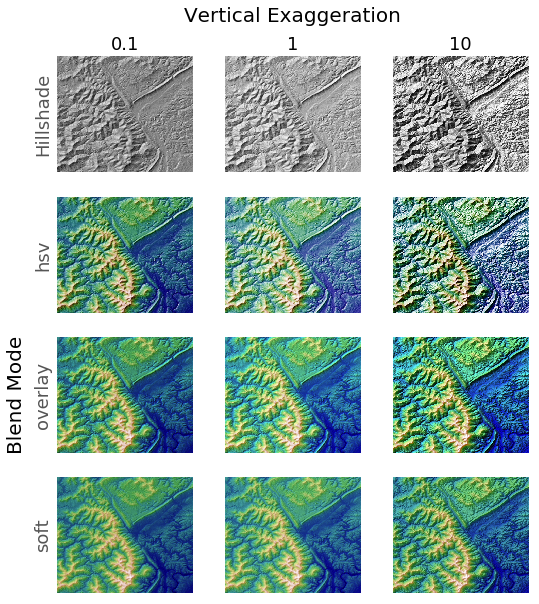

In [9]:
"""
Demonstrates the visual effect of varying blend mode and vertical exaggeration
on "hillshaded" plots.

Note that the "overlay" and "soft" blend modes work well for complex surfaces
such as this example, while the default "hsv" blend mode works best for smooth
surfaces such as many mathematical functions.

In most cases, hillshading is used purely for visual purposes, and *dx*/*dy*
can be safely ignored. In that case, you can tweak *vert_exag* (vertical
exaggeration) by trial and error to give the desired visual effect. However,
this example demonstrates how to use the *dx* and *dy* kwargs to ensure that
the *vert_exag* parameter is the true vertical exaggeration.
"""

from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

dem = np.load(get_sample_data('jacksboro_fault_dem.npz'))
z = dem['elevation']

#-- Optional dx and dy for accurate vertical exaggeration --------------------
# If you need topographically accurate vertical exaggeration, or you don't want
# to guess at what *vert_exag* should be, you'll need to specify the cellsize
# of the grid (i.e. the *dx* and *dy* parameters).  Otherwise, any *vert_exag*
# value you specify will be relative to the grid spacing of your input data
# (in other words, *dx* and *dy* default to 1.0, and *vert_exag* is calculated
# relative to those parameters).  Similarly, *dx* and *dy* are assumed to be in
# the same units as your input z-values.  Therefore, we'll need to convert the
# given dx and dy from decimal degrees to meters.
dx, dy = dem['dx'], dem['dy']
dy = 111200 * dy
dx = 111200 * dx * np.cos(np.radians(dem['ymin']))
#-----------------------------------------------------------------------------

# Shade from the northwest, with the sun 45 degrees from horizontal
ls = LightSource(azdeg=315, altdeg=45)
cmap = plt.cm.gist_earth

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 9))
plt.setp(axes.flat, xticks=[], yticks=[])

# Vary vertical exaggeration and blend mode and plot all combinations
for col, ve in zip(axes.T, [0.1, 1, 10]):
    # Show the hillshade intensity image in the first row
    col[0].imshow(ls.hillshade(z, vert_exag=ve, dx=dx, dy=dy), cmap='gray')

    # Place hillshaded plots with different blend modes in the rest of the rows
    for ax, mode in zip(col[1:], ['hsv', 'overlay', 'soft']):
        rgb = ls.shade(z, cmap=cmap, blend_mode=mode,
                       vert_exag=ve, dx=dx, dy=dy)
        ax.imshow(rgb)

# Label rows and columns
for ax, ve in zip(axes[0], [0.1, 1, 10]):
    ax.set_title('{0}'.format(ve), size=18)
for ax, mode in zip(axes[:, 0], ['Hillshade', 'hsv', 'overlay', 'soft']):
    ax.set_ylabel(mode, size=18)

# Group labels...
axes[0, 1].annotate('Vertical Exaggeration', (0.5, 1), xytext=(0, 30),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='center', va='bottom', size=20)
axes[2, 0].annotate('Blend Mode', (0, 0.5), xytext=(-30, 0),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='right', va='center', size=20, rotation=90)
fig.subplots_adjust(bottom=0.05, right=0.95)

plt.show()

In [10]:
%%sh

# rm test*png